<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/MNSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the MNSIT dataset
print("---Load teh MNSIT Dataset----")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

---Load teh MNSIT Dataset----
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#Data preprocessing
x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [7]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {y_train.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (60000, 10)


In [10]:
#building the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
print("\nTraining the model....")
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Training the model....
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8758 - loss: 0.4283 - val_accuracy: 0.9752 - val_loss: 0.0877
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9768 - loss: 0.0826 - val_accuracy: 0.9850 - val_loss: 0.0572
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9846 - loss: 0.0518 - val_accuracy: 0.9853 - val_loss: 0.0547
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9891 - loss: 0.0376 - val_accuracy: 0.9882 - val_loss: 0.0483
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9914 - loss: 0.0281 - val_accuracy: 0.9872 - val_loss: 0.0511


In [13]:
#model evaluation
print("\nEvaluating the model....")
loss, accuracy = model.evaluate(x_test, y_test,verbose=0)
print(f"Test accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


Evaluating the model....
Test accuracy: 98.45%
Test Loss: 0.0512


In [14]:
#making the prediction
print("\nMaking predictions....")
predictions = model.predict(x_test)


Making predictions....
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


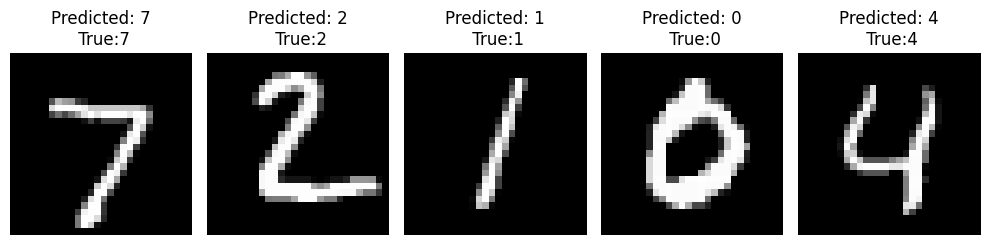

In [15]:
#printing the first 5 images
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\n True:{np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()